In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

#to perform non parametric tests

from scipy.stats import wilcoxon
from scipy.stats import friedmanchisquare
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
from scipy.stats import chi2_contingency

#to perform parametric tests

from scipy.stats import ttest_1samp
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind

#To perform Correlation

from scipy.stats import pearsonr
  
#To check normality

from scipy.stats import kurtosis,skew

%matplotlib inline

In [5]:
dataset = pd.read_csv("D:\AI - ML\\general_data.csv")
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [6]:
df=dataset.dropna()
df.drop_duplicates()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,No,Travel_Rarely,Sales,4,3,Other,1,4405,Female,...,1.0,Y,18,8,0,6.0,2,6,1,5
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2


In [7]:
df.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4382.000000,4382.000000,4382.000000,4382.0,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.0,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000
mean,36.933364,9.198996,2.912369,1.0,2207.804884,2.063898,65061.702419,2.693291,15.210634,8.0,0.794614,11.290278,2.798266,7.010497,2.191693,4.126198
std,9.137272,8.105396,1.024728,0.0,1271.688783,1.106115,47142.310175,2.497832,3.663007,0.0,0.852397,7.785717,1.289402,6.129351,3.224994,3.569674
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1108.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2208.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3308.750000,3.000000,83790.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4409.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [8]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [9]:
dataset1 = df[['Age','DistanceFromHome','Education', 'MonthlyIncome',
       'NumCompaniesWorked','PercentSalaryHike', 'StandardHours','TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']].describe()
dataset1

,Age,DistanceFromHome,Education,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.0,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000
mean,36.933364,9.198996,2.912369,65061.702419,2.693291,15.210634,8.0,11.290278,2.798266,7.010497,2.191693,4.126198
std,9.137272,8.105396,1.024728,47142.310175,2.497832,3.663007,0.0,7.785717,1.289402,6.129351,3.224994,3.569674
min,18.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,29110.000000,1.000000,12.000000,8.0,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,49190.000000,2.000000,14.000000,8.0,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,83790.000000,4.000000,18.000000,8.0,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,199990.000000,9.000000,25.000000,8.0,40.000000,6.000000,40.000000,15.000000,17.000000


In [10]:
dataset1 = df[['Age','DistanceFromHome','Education', 'MonthlyIncome',
       'NumCompaniesWorked','PercentSalaryHike', 'StandardHours','TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']].median()
dataset1

Age                           36.0
DistanceFromHome               7.0
Education                      3.0
MonthlyIncome              49190.0
NumCompaniesWorked             2.0
PercentSalaryHike             14.0
StandardHours                  8.0
TotalWorkingYears             10.0
TrainingTimesLastYear          3.0
YearsAtCompany                 5.0
YearsSinceLastPromotion        1.0
YearsWithCurrManager           3.0
dtype: float64

In [11]:
dataset1 = df[['Age','DistanceFromHome','Education', 'MonthlyIncome',
       'NumCompaniesWorked','PercentSalaryHike', 'StandardHours','TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']].mode()
dataset1

,Age,DistanceFromHome,Education,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,35,2,3,23420,1.0,11,8,10.0,2,5,0,2


In [16]:
dataset1 = df[['Age','DistanceFromHome','Education', 'MonthlyIncome',
       'NumCompaniesWorked','PercentSalaryHike', 'StandardHours','TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']].var()
dataset1

Age                        8.348974e+01
DistanceFromHome           6.569744e+01
Education                  1.050068e+00
MonthlyIncome              2.222397e+09
NumCompaniesWorked         6.239165e+00
PercentSalaryHike          1.341762e+01
StandardHours              0.000000e+00
TotalWorkingYears          6.061739e+01
TrainingTimesLastYear      1.662558e+00
YearsAtCompany             3.756894e+01
YearsSinceLastPromotion    1.040059e+01
YearsWithCurrManager       1.274257e+01
dtype: float64

In [17]:
dataset1 = df[['Age','DistanceFromHome','Education', 'MonthlyIncome',
       'NumCompaniesWorked','PercentSalaryHike', 'StandardHours','TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']].skew()
dataset1

Age                        0.413048
DistanceFromHome           0.955517
Education                 -0.288977
MonthlyIncome              1.367457
NumCompaniesWorked         1.029174
PercentSalaryHike          0.819510
StandardHours              0.000000
TotalWorkingYears          1.115419
TrainingTimesLastYear      0.551818
YearsAtCompany             1.764619
YearsSinceLastPromotion    1.980992
YearsWithCurrManager       0.834277
dtype: float64

In [18]:
dataset1 = df[['Age','DistanceFromHome','Education', 'MonthlyIncome',
       'NumCompaniesWorked','PercentSalaryHike', 'StandardHours','TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']].kurt()
dataset1

Age                       -0.409517
DistanceFromHome          -0.230691
Education                 -0.565008
MonthlyIncome              0.990836
NumCompaniesWorked         0.014307
PercentSalaryHike         -0.306951
StandardHours              0.000000
TotalWorkingYears          0.909316
TrainingTimesLastYear      0.494215
YearsAtCompany             3.930726
YearsSinceLastPromotion    3.592162
YearsWithCurrManager       0.170703
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0xcff4838>,
 'caps': [<matplotlib.lines.Line2D at 0xcff4b98>,
 'boxes': [<matplotlib.lines.Line2D at 0xcff4670>],
 'medians': [<matplotlib.lines.Line2D at 0xcff4ef8>],
 'fliers': [<matplotlib.lines.Line2D at 0xd00a0d0>],
 'means': []}

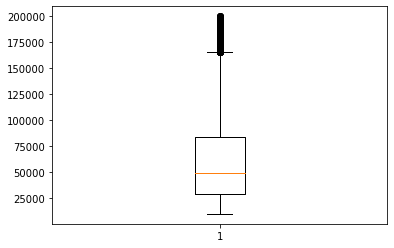

In [19]:
plt.boxplot(dataset.MonthlyIncome)

{'whiskers': [<matplotlib.lines.Line2D at 0xe0888f8>,
 'caps': [<matplotlib.lines.Line2D at 0xe088c58>,
 'boxes': [<matplotlib.lines.Line2D at 0xe088748>],
 'medians': [<matplotlib.lines.Line2D at 0xe088fb8>],
 'fliers': [<matplotlib.lines.Line2D at 0xe094190>],
 'means': []}

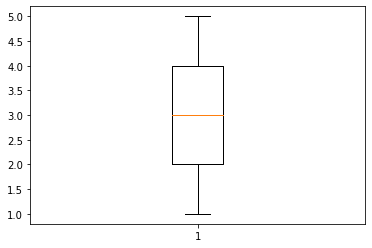

In [20]:
plt.boxplot(dataset.Education)

{'whiskers': [<matplotlib.lines.Line2D at 0xe0c7670>,
 'caps': [<matplotlib.lines.Line2D at 0xe0c79d0>,
 'boxes': [<matplotlib.lines.Line2D at 0xe0c74c0>],
 'medians': [<matplotlib.lines.Line2D at 0xe0c7d30>],
 'fliers': [<matplotlib.lines.Line2D at 0xe0c7ee0>],
 'means': []}

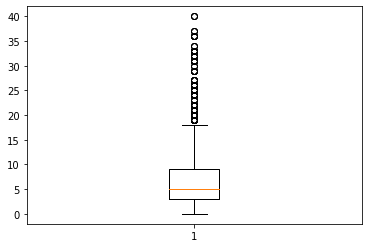

In [21]:
plt.boxplot(dataset.YearsAtCompany)

(array([ 508.,    0.,  842.,    0.,    0., 1701.,    0., 1188.,    0.,
         143.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

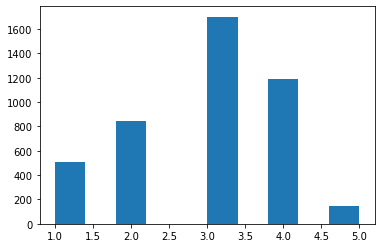

In [22]:
plt.hist(df.Education)

(array([1402., 1405.,  936.,  228.,  134.,  172.,   48.,   18.,   27.,
          12.]),
 array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36., 40.]),
 <BarContainer object of 10 artists>)

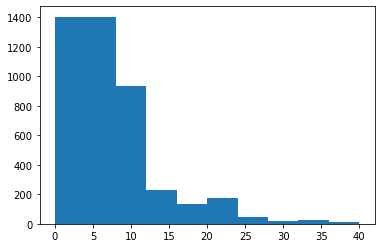

In [23]:
plt.hist(df.YearsAtCompany)

# Statstical Tests


In [25]:
df["Attrition"].replace({"Yes":1, "No":0}, inplace=True )

c:\users\ankyts\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [26]:
df.describe()

,Age,Attrition,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4382.000000,4382.000000,4382.000000,4382.000000,4382.0,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.0,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000
mean,36.933364,0.160885,9.198996,2.912369,1.0,2207.804884,2.063898,65061.702419,2.693291,15.210634,8.0,0.794614,11.290278,2.798266,7.010497,2.191693,4.126198
std,9.137272,0.367467,8.105396,1.024728,0.0,1271.688783,1.106115,47142.310175,2.497832,3.663007,0.0,0.852397,7.785717,1.289402,6.129351,3.224994,3.569674
min,18.000000,0.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,2.000000,2.000000,1.0,1108.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,0.000000,7.000000,3.000000,1.0,2208.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,0.000000,14.000000,4.000000,1.0,3308.750000,3.000000,83790.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,1.000000,29.000000,5.000000,1.0,4409.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


#scipy.stats.mannwhitneyu() Test

In [31]:
# Null Hypothesis: there is no significant difference in the current salary between employees
# in the company and left the company
# Alternative Hypothesis: There is a difference in the current salary between employees
# in the company and left the company

stats, p = mannwhitneyu(attydata.MonthlyIncome, attndata.MonthlyIncome)
print(stats,p)

if(p<0.05):
    print("Null Hypothesis is regected")
else:
    print("Null Hypothesis is accepted")


1249573.5 0.06508807631576838
Null Hypothesis is accepted


In [36]:
attydata["EducationField"].replace({"Life Sciences":0, "Medical":1, "Other":2}, inplace=True)

dataLS = attydata.loc[attydata["EducationField"]==0]
dataM = attydata.loc[attydata["EducationField"]==1]
dataO = attydata.loc[attydata["EducationField"]==2]


In [37]:
# Null Hypothesis: there is no significant difference in the current salary between employees whose education is 
# Life Science, Medical and Others
# Alternative Hypothesis: There is a difference in the current salary between employees whose ducation is 
# Life Science, Medical and Others

stats, p = kruskal(dataLS.MonthlyIncome, dataM.MonthlyIncome, dataO.MonthlyIncome)
print(stats,p)

if(p<0.05):
    print("Null Hypothesis is regected")
else:
    print("Null Hypothesis is accepted")


3.7713008825857095 0.15173033565021432
Null Hypothesis is accepted


In [38]:
chitable = pd.crosstab(df.Attrition,df.Gender)
chitable

Gender,Female,Male
Attrition,,
0,1488,2189
1,268,437


In [39]:
#Null Hypothesis: There is no dependency of attrition over gender
#Alternative Hypothesis: There is dependency of attrition over gender
stats,p,dof,expected = chi2_contingency(chitable)
print(stats,p)

if(p<0.05):
    print("Null Hypothesis is regected")
else:
    print("Null Hypothesis is accepted")


1.3825823839528295 0.23966176275638887
Null Hypothesis is accepted


In [40]:
#Null Hypothesis: There is no significant difference in the average means of age between attrition and non attrition employess
#ALternate Hypothesis: There is Aa significant difference in the average means of age between attrition and non attrition employess

stats,p = ttest_ind(attydata.Age, attndata.Age)
print(stats,p)

if(p<0.05):
    print("Null Hypothesis is rejected")
else:
    print("Null Hypothesis is accepted")


-10.617111568458819 5.126598219406313e-26
Null Hypothesis is rejected


Correlation value is -0.009448638515156229
p-value is 0.5317715668019558
Null Hypothesis is accepted


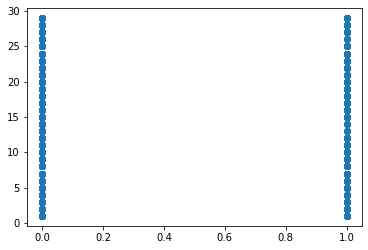

In [41]:
stats,p= pearsonr(df.Attrition,df.DistanceFromHome)

print("Correlation value is",stats)
print("p-value is",p)

if p<0.05:
    print("Null Hypothesis is regected")
else:
    print("Null Hypothesis is accepted")
    
plt.scatter(df.Attrition,df.DistanceFromHome)


Correlation value is -0.017106307050278748
p-value is 0.25757539308157945
Null Hypothesis is accepted


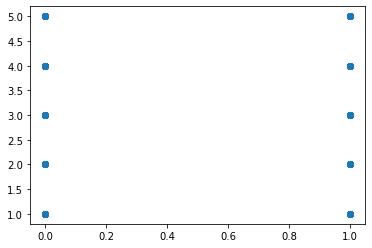

In [42]:
stats,p= pearsonr(df.Attrition,df.Education)

print("Correlation value is",stats)
print("p-value is",p)

if p<0.05:
    print("Null Hypothesis is regected")
else:
    print("Null Hypothesis is accepted")
    
plt.scatter(df.Attrition,df.Education)

Correlation value is -0.030160293808460616
p-value is 0.045890862744719166
Null Hypothesis is regected


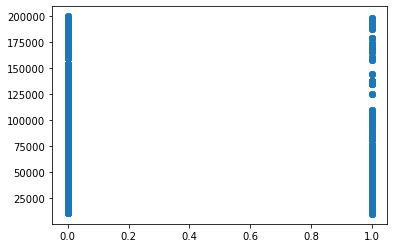

In [43]:
stats,p= pearsonr(df.Attrition,df.MonthlyIncome)

print("Correlation value is",stats)
print("p-value is",p)

if p<0.05:
    print("Null Hypothesis is regected")
else:
    print("Null Hypothesis is accepted")
    
plt.scatter(df.Attrition,df.MonthlyIncome)


Correlation value is -0.13300261842521555
p-value is 9.476118084838662e-19
Null Hypothesis is regected


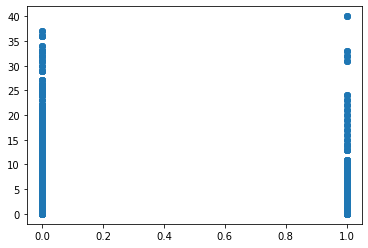

In [44]:
stats,p= pearsonr(df.Attrition,df.YearsAtCompany)

print("Correlation value is",stats)
print("p-value is",p)

if p<0.05:
    print("Null Hypothesis is regected")
else:
    print("Null Hypothesis is accepted")
    
plt.scatter(df.Attrition,df.YearsAtCompany)


In [45]:
df.dtypes


Age                          int64
Attrition                    int64
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object